/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


            new_cases  new_cases_smoothed
Date                                     
2020-07-01         54              48.714
2020-07-02         63              52.143
2020-07-03         63              53.857
2020-07-04         61              53.714
2020-07-05         46              54.286
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_cases           335 non-null    int64  
 1   new_cases_smoothed  335 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


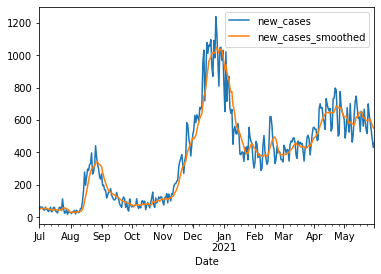

In [ ]:
#read csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('202'+x, '%Y-%m-%d')
 
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Datasets%20for%20ARIMA%20(Only%20Date%20%2B%20Confirmed)/South%20Korea%20(Date%20%2B%20New%20Cases%20%2B%20Smoothed%20New%20Cases).csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
print(series.info())
series.plot()
pyplot.show()

#we only use the raw data so we drop the smoothed data attribute out
series = series.drop(columns =['new_cases_smoothed'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Observations: 115
Training Observations: 60
Testing Observations: 55
Observations: 170
Training Observations: 115
Testing Observations: 55
Observations: 225
Training Observations: 170
Testing Observations: 55
Observations: 280
Training Observations: 225
Testing Observations: 55
Observations: 335
Training Observations: 280
Testing Observations: 55


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

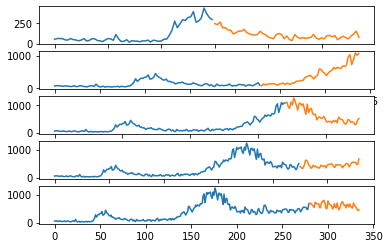

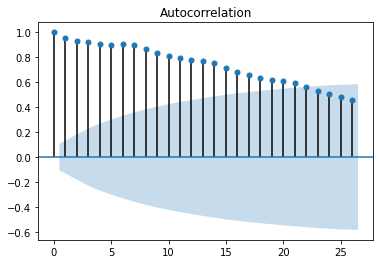

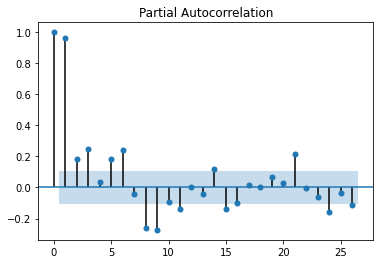

In [ ]:
#Implementation of rolling-forward validation train-test split
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
X = series.values
splits = TimeSeriesSplit(n_splits=5)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(510 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

#Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
pyplot.show()
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
pyplot.show()

In [ ]:
#split dataset into two subsets and calculate the mean
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=194.000000, mean2=571.000000


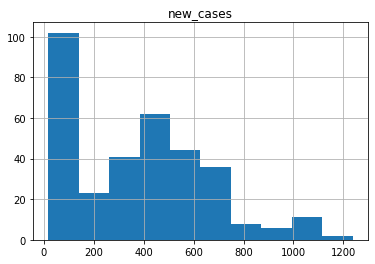

In [ ]:
#check distribution of raw data set
series.hist()
pyplot.show()

In [ ]:
#define function for ADF test (check stationarity)
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(series['new_cases'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.546110
p-value                          0.104654
#Lags Used                      15.000000
Number of Observations Used    319.000000
Critical Value (1%)             -3.451017
Critical Value (5%)             -2.870643
Critical Value (10%)            -2.571620
dtype: float64


[0.42201759]


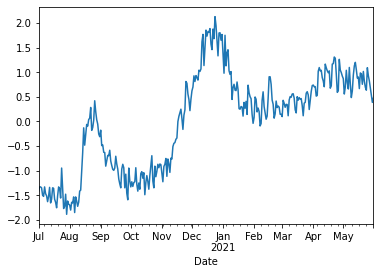

In [ ]:
#Power transformation to achieve stationarity as far as possible
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
pt.fit(series)
print(pt.lambdas_)
series['y'] = pt.transform(series)
series['y'].plot()


In [ ]:
#make sure to drop NaN or inf values
series = series.drop(columns = ['new_cases'])
series.dropna(inplace=True)
print(series.head())
print(series.info())

                   y
Date                
2020-07-01 -1.416756
2020-07-02 -1.330754
2020-07-03 -1.330754
2020-07-04 -1.349229
2020-07-05 -1.500331
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       335 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB
None


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:60], X[60:115] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


ARIMA(0, 0, 0) RMSE=0.333
ARIMA(0, 0, 1) RMSE=0.253
ARIMA(0, 0, 2) RMSE=0.266
ARIMA(0, 0, 3) RMSE=0.246
ARIMA(0, 1, 0) RMSE=0.226
ARIMA(0, 1, 1) RMSE=0.216
ARIMA(0, 1, 2) RMSE=0.216
ARIMA(0, 1, 3) RMSE=0.217
ARIMA(0, 2, 0) RMSE=0.349
ARIMA(0, 2, 1) RMSE=0.230
ARIMA(1, 0, 0) RMSE=0.214
ARIMA(1, 0, 1) RMSE=0.208
ARIMA(1, 1, 0) RMSE=0.219
ARIMA(1, 1, 1) RMSE=0.216
ARIMA(1, 2, 0) RMSE=0.297
ARIMA(2, 0, 0) RMSE=0.210
ARIMA(2, 0, 1) RMSE=0.207
ARIMA(2, 0, 2) RMSE=0.208
ARIMA(2, 0, 3) RMSE=0.210
ARIMA(2, 1, 0) RMSE=0.216
ARIMA(2, 1, 1) RMSE=0.217
ARIMA(2, 1, 2) RMSE=0.227
ARIMA(2, 2, 0) RMSE=0.266
ARIMA(2, 2, 1) RMSE=0.224
Best ARIMA(2, 0, 1) RMSE=0.207


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  42.445
Method:                       css-mle   S.D. of innovations              0.213
Date:                Sat, 17 Jul 2021   AIC                            -72.890
Time:                        03:24:02   BIC                            -50.023
Sample:                    07-02-2020   HQIC                           -63.772
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.009      0.596      0.552      -0.012       0.023
ar.L1.D.y      1.3946      0.062     22.646      0.000       1.274       1.515
ar.L2.D.y     -0.5988      0.063     -9.540      0.0

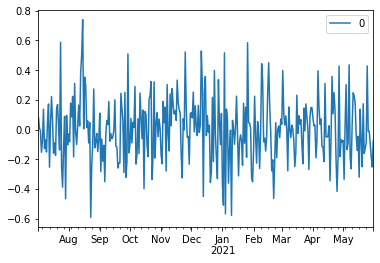

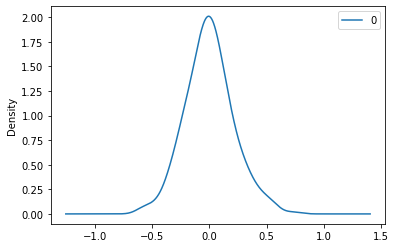

                0
count  334.000000
mean     0.000332
std      0.213195
min     -0.590161
25%     -0.134145
50%     -0.002939
75%      0.127593
max      0.740337
predicted=0.010383, expected=-0.256080
predicted=-0.283144, expected=-0.311185
predicted=-0.352360, expected=-0.178454
predicted=-0.171268, expected=-0.492686
predicted=-0.363241, expected=-0.478369
predicted=-0.440628, expected=-0.627669
predicted=-0.673900, expected=-0.632900
predicted=-0.690931, expected=-0.909036
predicted=-0.834613, expected=-0.804960
predicted=-0.744126, expected=-0.691670
predicted=-0.722050, expected=-0.697130
predicted=-0.753452, expected=-0.586450
predicted=-0.588294, expected=-0.804960
predicted=-0.685779, expected=-0.896367
predicted=-0.830396, expected=-0.974289
predicted=-1.035116, expected=-0.994530
predicted=-1.084795, expected=-0.947793
predicted=-0.938597, expected=-0.708109
predicted=-0.641858, expected=-0.865211
predicted=-0.784039, expected=-0.967614
predicted=-0.985252, expected=-1.169799

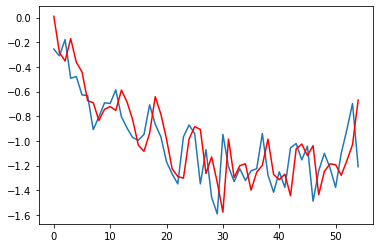

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (60 training observations and 55 testing observations)
train, test = X[:60], X[60:115] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:115], X[115:170] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=1.327
ARIMA(0, 0, 1) RMSE=0.777
ARIMA(0, 0, 2) RMSE=0.581
ARIMA(0, 1, 0) RMSE=0.228
ARIMA(0, 1, 1) RMSE=0.225
ARIMA(0, 1, 2) RMSE=0.221
ARIMA(0, 1, 3) RMSE=0.221
ARIMA(0, 2, 0) RMSE=0.352
ARIMA(0, 2, 1) RMSE=0.228
ARIMA(1, 0, 0) RMSE=0.245
ARIMA(1, 1, 0) RMSE=0.228
ARIMA(1, 1, 2) RMSE=0.220
ARIMA(1, 2, 0) RMSE=0.314
ARIMA(2, 0, 0) RMSE=0.243
ARIMA(2, 1, 0) RMSE=0.221
ARIMA(2, 1, 1) RMSE=0.222
ARIMA(2, 1, 2) RMSE=0.219
ARIMA(2, 2, 0) RMSE=0.268
ARIMA(2, 2, 1) RMSE=0.218
Best ARIMA(2, 2, 1) RMSE=0.218


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  42.445
Method:                       css-mle   S.D. of innovations              0.213
Date:                Sat, 17 Jul 2021   AIC                            -72.890
Time:                        03:24:19   BIC                            -50.023
Sample:                    07-02-2020   HQIC                           -63.772
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.009      0.596      0.552      -0.012       0.023
ar.L1.D.y      1.3946      0.062     22.646      0.000       1.274       1.515
ar.L2.D.y     -0.5988      0.063     -9.540      0.0

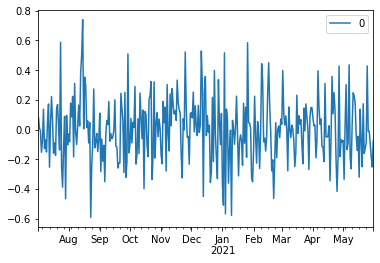

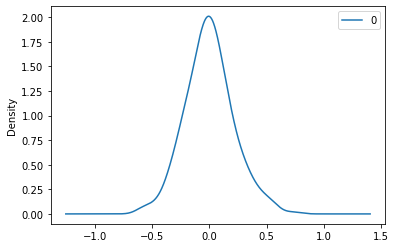

                0
count  334.000000
mean     0.000332
std      0.213195
min     -0.590161
25%     -0.134145
50%     -0.002939
75%      0.127593
max      0.740337
predicted=-1.102722, expected=-1.349229
predicted=-1.214772, expected=-0.909036
predicted=-0.975742, expected=-1.123491
predicted=-1.166426, expected=-1.015101
predicted=-1.008159, expected=-0.871384
predicted=-0.919569, expected=-0.941253
predicted=-0.948977, expected=-0.865211
predicted=-0.865546, expected=-0.877587
predicted=-0.880796, expected=-1.057297
predicted=-1.001057, expected=-1.226341
predicted=-1.139504, expected=-0.915417
predicted=-0.959481, expected=-0.871384
predicted=-0.946401, expected=-0.752872
predicted=-0.795516, expected=-1.115951
predicted=-1.034690, expected=-0.764283
predicted=-0.785034, expected=-0.865211
predicted=-0.890810, expected=-1.036017
predicted=-0.970280, expected=-0.747200
predicted=-0.786459, expected=-0.764283
predicted=-0.813278, expected=-0.511974
predicted=-0.585217, expected=-0.44544

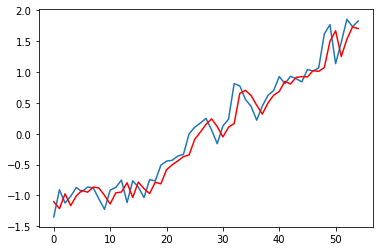

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (115 training observations and 55 testing observations)
train, test = X[:115], X[115:170] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:170], X[170:225] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.505
ARIMA(0, 0, 1) RMSE=0.874
ARIMA(0, 0, 2) RMSE=0.642
ARIMA(0, 1, 0) RMSE=0.288
ARIMA(0, 1, 1) RMSE=0.272
ARIMA(0, 1, 2) RMSE=0.272
ARIMA(0, 1, 3) RMSE=0.272
ARIMA(0, 2, 0) RMSE=0.466
ARIMA(0, 2, 1) RMSE=0.292
ARIMA(1, 0, 0) RMSE=0.284
ARIMA(1, 1, 0) RMSE=0.277
ARIMA(1, 1, 1) RMSE=0.271
ARIMA(1, 1, 2) RMSE=0.271
ARIMA(1, 2, 0) RMSE=0.379
ARIMA(2, 0, 0) RMSE=0.272
ARIMA(2, 1, 0) RMSE=0.272
ARIMA(2, 1, 1) RMSE=0.273
ARIMA(2, 1, 2) RMSE=0.272
ARIMA(2, 2, 0) RMSE=0.328
ARIMA(2, 2, 1) RMSE=0.281
Best ARIMA(1, 1, 1) RMSE=0.271


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  42.445
Method:                       css-mle   S.D. of innovations              0.213
Date:                Sat, 17 Jul 2021   AIC                            -72.890
Time:                        03:24:55   BIC                            -50.023
Sample:                    07-02-2020   HQIC                           -63.772
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.009      0.596      0.552      -0.012       0.023
ar.L1.D.y      1.3946      0.062     22.646      0.000       1.274       1.515
ar.L2.D.y     -0.5988      0.063     -9.540      0.0

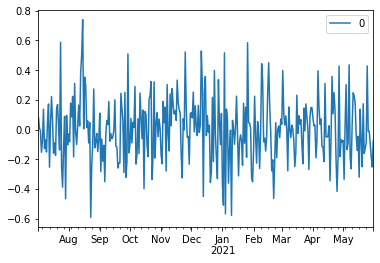

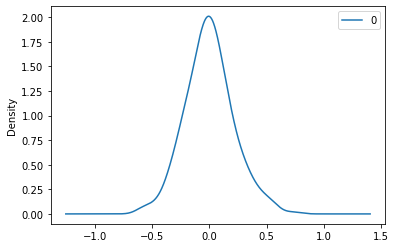

                0
count  334.000000
mean     0.000332
std      0.213195
min     -0.590161
25%     -0.134145
50%     -0.002939
75%      0.127593
max      0.740337
predicted=1.843952, expected=1.812510
predicted=1.820550, expected=1.884169
predicted=1.896474, expected=1.570078
predicted=1.657814, expected=1.456738
predicted=1.575640, expected=1.875295
predicted=1.834920, expected=1.679458
predicted=1.668300, expected=2.127022
predicted=2.072165, expected=1.949120
predicted=1.929380, expected=1.654841
predicted=1.788820, expected=1.330582
predicted=1.497162, expected=1.794351
predicted=1.793473, expected=1.799809
predicted=1.747407, expected=1.649133
predicted=1.697192, expected=1.765086
predicted=1.788785, expected=1.364190
predicted=1.475389, expected=0.978157
predicted=1.181925, expected=1.748510
predicted=1.682623, expected=1.127174
predicted=1.179885, expected=1.395356
predicted=1.457662, expected=1.454712
predicted=1.406032, expected=1.027949
predicted=1.186222, expected=0.954120
pr

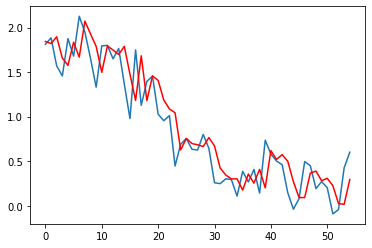

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (170 training observations and 55 testing observations)
train, test = X[0:170], X[170:225] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:225], X[225:280] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.699
ARIMA(0, 0, 1) RMSE=0.412
ARIMA(0, 0, 2) RMSE=0.305
ARIMA(0, 0, 3) RMSE=0.268
ARIMA(0, 1, 0) RMSE=0.185
ARIMA(0, 1, 1) RMSE=0.192
ARIMA(0, 1, 2) RMSE=0.182
ARIMA(0, 1, 3) RMSE=0.185
ARIMA(0, 2, 0) RMSE=0.243
ARIMA(0, 2, 1) RMSE=0.186
ARIMA(1, 0, 0) RMSE=0.185
ARIMA(1, 0, 1) RMSE=0.192
ARIMA(1, 0, 2) RMSE=0.183
ARIMA(1, 0, 3) RMSE=0.186
ARIMA(1, 1, 0) RMSE=0.192
ARIMA(1, 1, 1) RMSE=0.184
ARIMA(1, 1, 2) RMSE=0.184
ARIMA(1, 2, 0) RMSE=0.242
ARIMA(2, 0, 0) RMSE=0.191
ARIMA(2, 0, 1) RMSE=0.185
ARIMA(2, 0, 2) RMSE=0.185
ARIMA(2, 1, 0) RMSE=0.190
ARIMA(2, 1, 1) RMSE=0.186
ARIMA(2, 1, 2) RMSE=0.184
ARIMA(2, 2, 0) RMSE=0.244
Best ARIMA(0, 1, 2) RMSE=0.182


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  42.445
Method:                       css-mle   S.D. of innovations              0.213
Date:                Sat, 17 Jul 2021   AIC                            -72.890
Time:                        03:25:31   BIC                            -50.023
Sample:                    07-02-2020   HQIC                           -63.772
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.009      0.596      0.552      -0.012       0.023
ar.L1.D.y      1.3946      0.062     22.646      0.000       1.274       1.515
ar.L2.D.y     -0.5988      0.063     -9.540      0.0

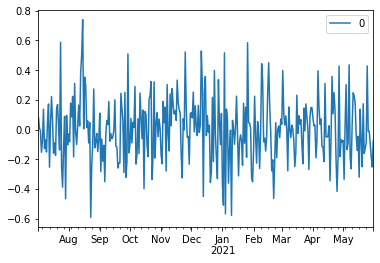

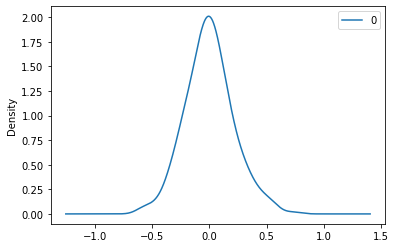

                0
count  334.000000
mean     0.000332
std      0.213195
min     -0.590161
25%     -0.134145
50%     -0.002939
75%      0.127593
max      0.740337
predicted=0.461972, expected=0.301977
predicted=0.345374, expected=0.168586
predicted=0.270505, expected=0.044080
predicted=0.127018, expected=0.107272
predicted=0.140628, expected=0.463287
predicted=0.368724, expected=0.905389
predicted=0.717959, expected=0.905389
predicted=0.801852, expected=0.753512
predicted=0.773584, expected=0.433713
predicted=0.545037, expected=0.348813
predicted=0.458138, expected=0.065362
predicted=0.196074, expected=0.151734
predicted=0.200937, expected=0.412783
predicted=0.379282, expected=0.279776
predicted=0.297967, expected=0.311424
predicted=0.322476, expected=0.289318
predicted=0.302341, expected=0.144955
predicted=0.201101, expected=0.144955
predicted=0.176512, expected=0.096875
predicted=0.136463, expected=0.427752
predicted=0.371241, expected=0.367275
predicted=0.325724, expected=0.286142
pr

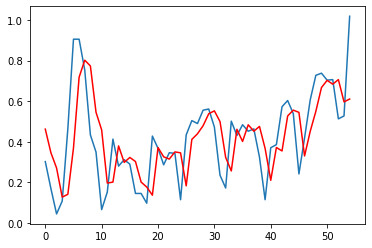

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (225 training observations and 55 testing observations)
train, test = X[:225], X[225:280] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:280], X[280:] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.995
ARIMA(0, 0, 1) RMSE=0.571
ARIMA(0, 0, 2) RMSE=0.408
ARIMA(0, 1, 0) RMSE=0.229
ARIMA(0, 1, 1) RMSE=0.227
ARIMA(0, 1, 2) RMSE=0.213
ARIMA(0, 1, 3) RMSE=0.214
ARIMA(0, 2, 0) RMSE=0.345
ARIMA(0, 2, 1) RMSE=0.230
ARIMA(1, 0, 0) RMSE=0.227
ARIMA(1, 0, 1) RMSE=0.225
ARIMA(1, 0, 2) RMSE=0.212
ARIMA(1, 0, 3) RMSE=0.213
ARIMA(1, 1, 0) RMSE=0.230
ARIMA(1, 1, 1) RMSE=0.217
ARIMA(1, 1, 2) RMSE=0.214
ARIMA(1, 1, 3) RMSE=0.209
ARIMA(1, 2, 0) RMSE=0.319
ARIMA(2, 0, 0) RMSE=0.228
ARIMA(2, 0, 1) RMSE=0.216
ARIMA(2, 0, 2) RMSE=0.213
ARIMA(2, 0, 3) RMSE=0.208
ARIMA(2, 1, 0) RMSE=0.220
ARIMA(2, 1, 1) RMSE=0.214
ARIMA(2, 1, 2) RMSE=0.207
ARIMA(2, 2, 0) RMSE=0.284
Best ARIMA(2, 1, 2) RMSE=0.207


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  42.445
Method:                       css-mle   S.D. of innovations              0.213
Date:                Sat, 17 Jul 2021   AIC                            -72.890
Time:                        03:25:51   BIC                            -50.023
Sample:                    07-02-2020   HQIC                           -63.772
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.009      0.596      0.552      -0.012       0.023
ar.L1.D.y      1.3946      0.062     22.646      0.000       1.274       1.515
ar.L2.D.y     -0.5988      0.063     -9.540      0.0

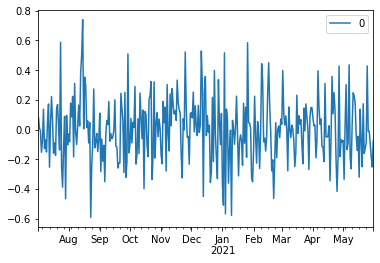

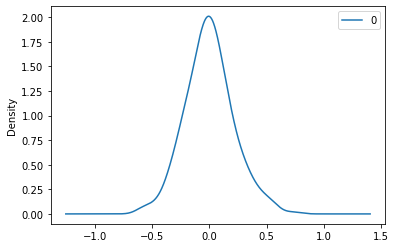

                0
count  334.000000
mean     0.000332
std      0.213195
min     -0.590161
25%     -0.134145
50%     -0.002939
75%      0.127593
max      0.740337
predicted=0.932047, expected=1.092962
predicted=0.994989, expected=1.025599
predicted=0.977706, expected=1.037331
predicted=1.018293, expected=0.888119
predicted=0.952701, expected=0.820422
predicted=0.928671, expected=0.703477
predicted=0.853883, expected=1.163213
predicted=1.142693, expected=1.088368
predicted=1.083910, expected=1.027949
predicted=1.037325, expected=0.987712
predicted=1.004473, expected=1.025599
predicted=1.022661, expected=0.674045
predicted=0.786075, expected=0.722027
predicted=0.796691, expected=1.163213
predicted=1.060102, expected=1.172151
predicted=1.059260, expected=1.307253
predicted=1.161594, expected=1.281591
predicted=1.179276, expected=0.961353
predicted=1.013038, expected=0.589159
predicted=0.799939, expected=0.619618
predicted=0.821981, expected=1.260032
predicted=1.226498, expected=1.042010
pr

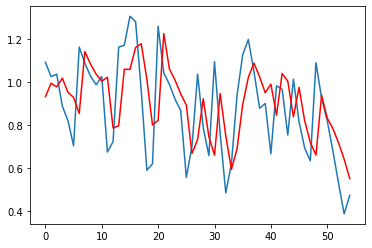

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (280 training observations and 55 testing observations)
train, test = X[:280], X[280:] 
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


                   y
2020-07-01 -1.416756
2020-07-02 -1.330754
2020-07-03 -1.330754
2020-07-04 -1.349229
2020-07-05 -1.500331
...              ...
2021-05-27  0.820422
2021-05-28  0.679422
2021-05-29  0.529916
2021-05-30  0.385588
2021-05-31  0.472086

[335 rows x 1 columns]


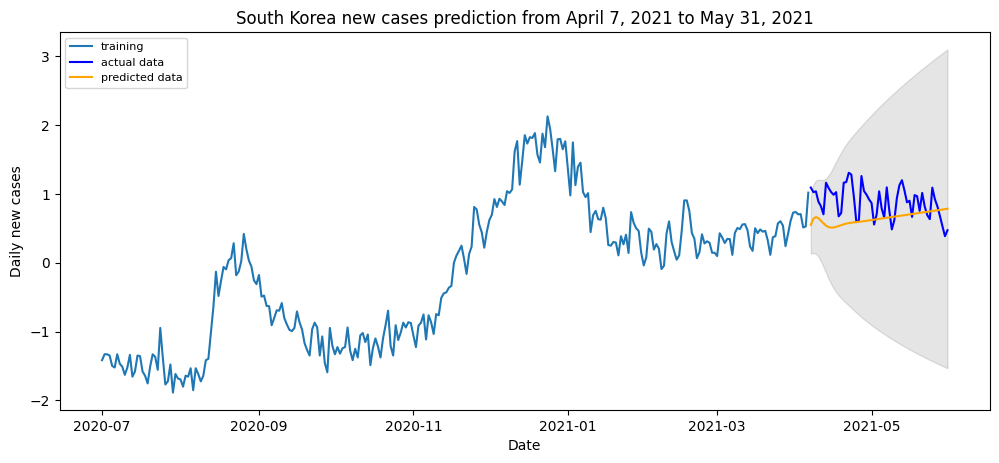

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf 
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox

print(series)
train1 = series.iloc[0:280]
idx1 = pd.date_range("2020-07-01", periods=280)
train1.index = idx1

test1 = series.iloc[280:]
idx2 = pd.date_range("2021-04-07", periods=55)
test1.index = idx2


# Forecast
fc, se, conf = model_fit.forecast(55, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[:, 0], index=test1.index)
upper_series = pd.Series(conf[:, 1], index=test1.index)
fig = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, color = 'blue', label='actual data')
plt.plot(fc_series, color = 'orange',label='predicted data')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('South Korea new cases prediction from April 7, 2021 to May 31, 2021')
plt.xlabel('Date')
plt.ylabel('Daily new cases')
plt.legend(loc='upper left', fontsize=8)
plt.show()
